In [1]:
from __future__ import print_function

In [2]:
import numpy as np
import pandas as pd

from IPython.display import Image

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

## Handwritten Digits

In [3]:
digits = datasets.load_digits()
print(digits.data.shape) 

(1797, 64)


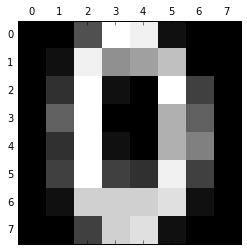

In [4]:
plt.gray()    
plt.matshow(digits.images[166]) 
plt.show()

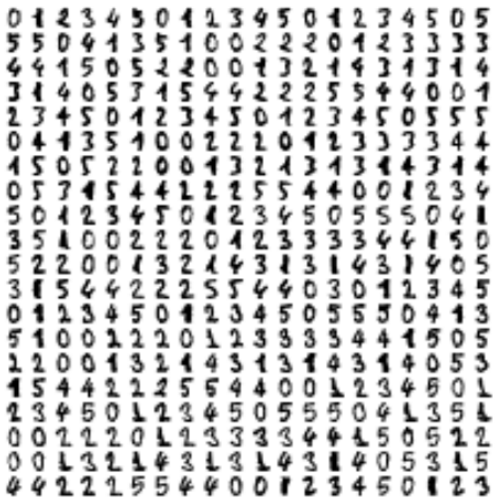

In [5]:
Image(filename='digits.png') 

In [6]:
X_centered = digits.data - digits.data.mean()
y = digits.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.5,random_state=42)

In [8]:
pd.Series(y_train).value_counts()

0    96
2    94
1    93
7    92
8    91
3    90
9    88
4    88
6    83
5    83
dtype: int64

## Visualize in lower Dimensions (via PCA)

In [9]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pcafeatures_train = pca.transform(X_train)

In [11]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    plt.legend()

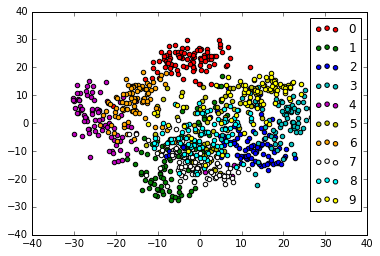

In [12]:
plot_PCA_2D(pcafeatures_train, target=y_train, target_names=digits.target_names)

## Build a SVM / SVC Model

In [13]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
y_pred = model_svm.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.97664071190211343

In [16]:
confusion_matrix(y_test,y_pred)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 88,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 88,  0,  0,  0,  1,  4,  0],
       [ 0,  1,  0,  0, 92,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 96,  0,  1,  0,  2],
       [ 2,  0,  0,  0,  0,  0, 96,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  1],
       [ 0,  2,  0,  0,  2,  1,  0,  1, 77,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 90]])

## Choose a more Complex Kernel to Overfit?

In [17]:
model_svm2 = svm.SVC(kernel='rbf', gamma = 0.001)
model_svm2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
y_pred2 = model_svm2.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred2)

0.98665183537263623

In [20]:
confusion_matrix(y_test,y_pred2)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 89,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 90,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 97,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  1, 96,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 83,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 88]])

## Picking the Model

In [22]:
from sklearn.externals import joblib

In [23]:
joblib.dump(model_svm2, "svm_model.pkl")

['svm_model.pkl']

In [25]:
my_model = joblib.load("svm_model.pkl")

In [26]:
y_pred_new = my_model.predict(X_test)

In [27]:
confusion_matrix(y_test,y_pred_new)

array([[82,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 89,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 83,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 90,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 97,  0,  0,  0,  2],
       [ 1,  0,  0,  0,  0,  1, 96,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 83,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 88]])